# Figure 2: Theoretically predicted learning dynamics for noise compared to weight decay for linear autoencoders.

This notebook provides the code to produce Figure 2 in the paper: "Learning dynamics of linear denoising autoencoders". (ICML 2018)

### Learning dynamics equation

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def scalar_learning_dynamics(lam, var, gamma, N, n_epoch, learning_rate):
    dynamics = []
    tau = 1/learning_rate
    u0 = 0.000001
    g = N*gamma
    xi = lam + N*var
    
    for t in range(n_epoch):
        E = np.exp(2*(lam - g)*t/tau)
        num = (lam-g)*E
        denom = xi*(E - 1) + (lam - g)/u0
        uf = num/denom
        dynamics.append(uf)
    
    return dynamics

### Theoretical dynamics simulation

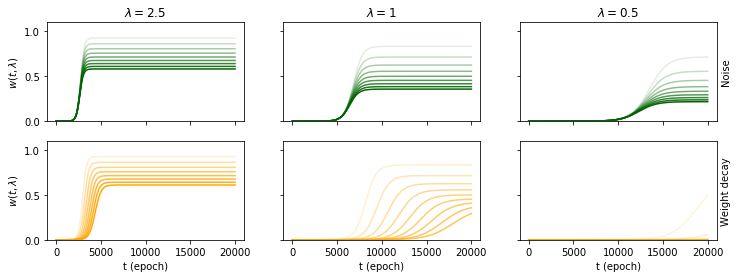

In [2]:
noise_dyns = []
reg_dyns = []
var = np.arange(0, 2, 0.2)
alphas = (var-np.min(var))/(np.max(var)-np.min(var))
lams = [2.5, 1, 0.5, 0.1]
fig, [(ax1, ax2, ax3), (ax4, ax5, ax6)] = plt.subplots(2, 3, figsize=(12, 4), 
                                                       sharex=True, sharey=True)
row1 = [ax1, ax2, ax3]
ax1.set_ylabel('$w(t, \lambda)$')
ax3.yaxis.set_label_position("right")
ax3.set_ylabel('Noise')
for l, ax in zip(lams, row1):
    for v, a in zip(var, alphas):
        dyns = scalar_learning_dynamics(l, v, 0, 1, 20000, 0.001) 
        noise_dyns.append(dyns)
        ax.set_ylim(0, 1.1)     
        ax.set_title('$\lambda =$' + str(l))
        ax.plot(dyns, c='darkgreen', alpha=a)
        
        
row2 = [ax4, ax5, ax6]
ax4.set_ylabel('$w(t, \lambda)$')
ax6.yaxis.set_label_position('right')
ax6.set_ylabel('Weight decay')
for l, ax in zip(lams, row2):
    reg = var*l/(var+l)
    for r in reg:
        dyns = scalar_learning_dynamics(l, 0, r, 1, 20000, 0.001) 
        reg_dyns.append(dyns)
        ax.set_ylim(0, 1.1)
        ax.set_xlabel('t (epoch)')
        ax.plot(dyns, c='orange', alpha=r)
    
plt.show()       

**Top**: Noise dynamics (green), darker line colours correspond to larger amounts of added noise. 

**Bottom**: Weight decay dynamics (orange), darker line colours correspond to larger amounts of regularisation.

**Left to right**: Eigenvalues $\lambda = 2.5, 1$ and $0.5$ associated with high to low variance.